 # Building linear regression from scratch 



In [17]:
import numpy as np

In [18]:
class Linear_Regression():

    #self is instance value

    #initializing the parameters(learning rate and number of iteration 
    def __init__(self,learning_rate,no_of_iterations):

        self.learning_rate=learning_rate
        self.no_of_iterations=no_of_iterations


    def fit(self,X,Y):

        #no. of training examples(no. of data_points) "m" of  and number of features(independent variables)"n"
        self.m, self.n=X.shape  #no. of rows and columns
        #initializing weight and bias
        self.w=np.zeros(self.n) #for one feature self.w=0
        self.b=0
        self.X=X
        self.Y=Y
        #implementing Gradient Descent
        for i in range(self.no_of_iterations):
            self.update_weights()
        


    def update_weights(self,):
        Y_prediction=self.predict(self.X)
        #calculate gradient
        dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m  #self.X.T ->transpose of data ->(1,30)
        db=-(2*np.sum(self.Y-Y_prediction))/self.m
        # updating the weights
        self.w=self.w-self.learning_rate*dw
        self.b=self.b-self.learning_rate*db

    def predict(self,X):
        return X.dot(self.w)+self.b #y=wx+b
        

# Using Linear Regression Model For Prediction 

In [19]:
#importing libraries

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## Data Preprocessing

In [20]:
#loading data from csv file to pandas dataframe

salary_data=pd.read_csv('salary_data.csv')

In [21]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [22]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [23]:
#no. of rows and columns
salary_data.shape

(30, 2)

In [24]:
#checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Splitting the feature and target

In [25]:
X=salary_data.iloc[:,:-1].values
Y=salary_data.iloc[:,1].values

In [26]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [27]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


## Splitting the dataset into training and testing data

In [28]:
x_train ,x_test ,y_train ,y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

## Training linear regression model

In [29]:
model=Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [30]:
model.fit(x_train,y_train)

In [31]:
#printing the parameters values
print('weight=',model.w[0])
print('bias=',model.b)

weight= 9514.400999035135
bias= 23697.406507136307


**y=9514(x)+23697**
**salary=9514(experience)+23697**

## Predicting the salary value for test data

In [32]:
test_data_prediction=model.predict(x_test)

In [33]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


## Visualizing predicted values and actual values

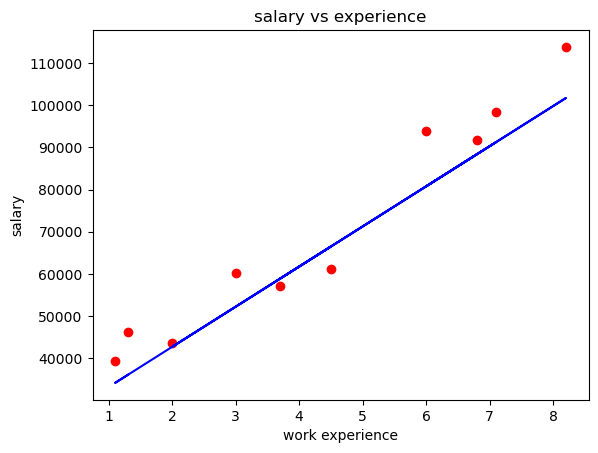

In [34]:
plt.scatter(x_test,y_test,color='red') # actual 
plt.plot(x_test,test_data_prediction,color='blue') #predicted
plt.xlabel("work experience")
plt.ylabel("salary")
plt.title("salary vs experience")
plt.show()